# Quiz #0801

## "Text Classification with Keras"

In [23]:
# LOADING LIBRARIES

import pandas as pd                 
import numpy as np                  
import re                          
import nltk                         
from nltk.corpus import stopwords   
import matplotlib.pyplot as plt     


from numpy import array
from keras.preprocessing.text import one_hot                                                
from keras.preprocessing.sequence import pad_sequences                                      
from keras.models import Sequential                                                         
from keras.layers.recurrent import LSTM                                                    
from keras.layers import Activation, Dropout, Dense, Flatten    
from keras.layers.embeddings import Embedding                                              
from sklearn.model_selection import train_test_split                                        
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.text import text_to_word_sequence 

np.random.seed(11)      # To reproduce results

### Answer the following question by providing Python code:

1). Read in the movie review data from Cornell CS department. Carry out the EDA.

*   The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data/).
*   Download the “polarity dataset” and unzip.
*    Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders.

In [ ]:
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [40]:
# Reading dataset
A = {'target': y.tolist(), 'text': my_docs}
movie_reviews = pd.DataFrame(A)
# First 5 entries in datatset
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
# Checking for any null entries in dataset
print(movie_reviews.isnull().values)

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [False False]
 [False False]]


In [13]:
# Number of positive and negative reviews in dataset
print("\nNumber of positive and negative reviews in dataset")
print(movie_reviews['sentiment'].value_counts())


Number of positive and negative reviews in dataset
negative    25000
positive    25000
Name: sentiment, dtype: int64


2). Carry out the data preprocessing:

*   Cleaning.
*   Stopword removal.

In [15]:
# DATA PREPROCESSING

# Sample review
print("\nSAMPLE REVIEW")
print(movie_reviews['review'][4])



SAMPLE REVIEW
Petter Mattei's "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is 

In [16]:
#Function to preprocess each review
    # 'r' is used to differentiate regex escaping and normal escape sequence 
def preprocess(sen):
    # Function to remove html tags is called
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    # '^' means NOT
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence


In [17]:
# Function to remove html tags
def remove_tags(text):
    return re.sub(r'<[^>]+>', '', text)

# Passing all the reviews into preprocess function defined earlier
    #Defining an empty list to store preprocessed text
X = []
# Converting our dataset from type "dataframe" to type "list"
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess(sen))


In [18]:
# Sample review after preprocessing
print("\nSAMPLE REVIEW AFTER PREPROCESSING")
print(X[4])


SAMPLE REVIEW AFTER PREPROCESSING
Petter Mattei Love in the Time of Money is visually stunning film to watch Mr Mattei offers us vivid portrait about human relations This is movie that seems to be telling us what money power and success do to people in the different situations we encounter This being variation on the Arthur Schnitzler play about the same theme the director transfers the action to the present time New York where all these different characters meet and connect Each one is connected in one way or another to the next person but no one seems to know the previous point of contact Stylishly the film has sophisticated luxurious look We are taken to see how these people live and the world they live in their own habitat The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we 

3). Carry out label encoding by integers (required form by Keras):

In [19]:
# One hot encoding of target feature
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [20]:
#Splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70)

In [21]:
# DATA PREPARATION

# Converts words into vectors holding sequence of intergers for corresponding words
tokenizer = Tokenizer(num_words=5000)
# Generate index for each string based on frequency (more frequent ; lesser the index value)
tokenizer.fit_on_texts(X_train)
print("\nNumber of unique words in training set") 
print(len(tokenizer.word_index))
# Substitute words with corresponding word index values

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)





Number of unique words in training set
90134


4). Prepare the data for AI:

*   Apply the padding.
*   Split the data into training and testing.

In [22]:
# Adding '1' as index '0' is reserved in word_index
vocab_size = len(tokenizer.word_index) + 1
# Setting maximum length of each list(review) to be of length 100 words
maxlen = 100
# Making the train and test statements to be of size 100 by truncating or padding accordingly
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

5). Define the AI model (Embedding + LSTM):

In [24]:
# Creating a dictionary with words as key and corresponding embedding list loaded from "GloVe" dataset as values
embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")
# Creating each line in GloVe dataset as a kwy-value pair
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [25]:
# Creating embedding matrix
embedding_matrix = np.zeros((vocab_size, 100))
# Getting vector representation (from embedding dictionary) of each word in word_index
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    #If word is not available in GloVE embedding text file, that word will be skipped
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [26]:
# CONSTRUCTING SIMPLE DEEP NEURAL NETWORK

# Creating a sequential model
dnn_model = Sequential()
# Setting imput and output size to 100. Since we are using "GloVe - a predefined embedding", we set "trainable" to False
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
dnn_model.add(embedding_layer)
# Flattening the embedding the layer
    # layer of dimension (5, 3) becomes (1, 15)
dnn_model.add(Flatten())
# Adding Dense layer with one dimension output space
    # Dense is made at final layer - Fully connected layer
dnn_model.add(Dense(1, activation='sigmoid'))

6). Define the optimizer and compile the model:

In [27]:
# Compiling the model
    #Optimizer used for faster convergence of model training
dnn_model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc'])
# Printing the model summary
print("\nSIMPLE DEEP NEURAL NETWORK MODEL")
print(dnn_model.summary())



SIMPLE DEEP NEURAL NETWORK MODEL
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          9013500   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 9,023,501
Trainable params: 10,001
Non-trainable params: 9,013,500
_________________________________________________________________
None


7). Train the model and visualize the summary:

In [28]:
# Training our model
dnn_history = dnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
# Evaluating the model's accuracy
dnn_score = dnn_model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
235/235 [==============================] - 2s 6ms/step - loss: 0.6334 - acc: 0.6449 - val_loss: 0.5470 - val_acc: 0.7240
Epoch 2/6
235/235 [==============================] - 1s 5ms/step - loss: 0.5241 - acc: 0.7396 - val_loss: 0.5245 - val_acc: 0.7423
Epoch 3/6
235/235 [==============================] - 1s 5ms/step - loss: 0.4844 - acc: 0.7660 - val_loss: 0.7398 - val_acc: 0.6463
Epoch 4/6
235/235 [==============================] - 1s 5ms/step - loss: 0.4560 - acc: 0.7856 - val_loss: 0.5597 - val_acc: 0.7229
Epoch 5/6
235/235 [==============================] - 1s 5ms/step - loss: 0.4349 - acc: 0.7983 - val_loss: 0.5381 - val_acc: 0.7365
Epoch 6/6
391/391 [==============================] - 1s 2ms/step - loss: 0.6215 - acc: 0.7027


8). Display the test result (accuracy):

In [29]:
print("\nTEST SCORES OF MODEL")
print("Test loss:", dnn_score[0])
print("Test Accuracy:", dnn_score[1])


TEST SCORES OF MODEL
Test loss: 0.621452808380127
Test Accuracy: 0.7027199864387512


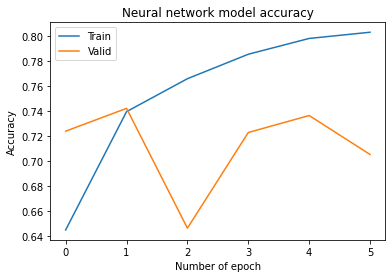

In [30]:
# Plotting graph for model built
    # Accuracy graph
plt.title('Neural network model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epoch')
plt.plot(dnn_history.history['acc'], label = 'Train')
plt.plot(dnn_history.history['val_acc'], label = 'Valid')
plt.legend(loc='best')
plt.show()


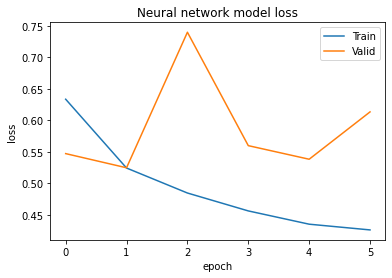

In [31]:
# Loss graph
plt.title('Neural network model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(dnn_history.history['loss'], label = 'Train')
plt.plot(dnn_history.history['val_loss'], label = 'Valid')
plt.legend(loc='best')
plt.show()

In [32]:
# LSTM RECURRENT NEURAL NETWORK

# Creating a sequential model
rnn_model = Sequential()
# Setting imput and output size to 100. Since we are using "GloVe - a predefined embedding", we set "trainable" to False
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
rnn_model.add(embedding_layer)
# LSTM model is created with 128 neurons
rnn_model.add(LSTM(128))
rnn_model.add(Dense(1, activation='sigmoid'))


In [33]:
#Compiling the model
rnn_model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc'])


In [34]:
# Printing the model summary
print("\nLSTM RECURRENT NEURAL NETWORK MODEL")
print(rnn_model.summary())


LSTM RECURRENT NEURAL NETWORK MODEL
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          9013500   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 9,130,877
Trainable params: 117,377
Non-trainable params: 9,013,500
_________________________________________________________________
None


In [35]:
# Training our model
rnn_history = rnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
# Evaluating the model's accuracy
rnn_score = rnn_model.evaluate(X_test, y_test, verbose=1)
print("\nTEST SCORES OF MODEL")
print("Test loss:", rnn_score[0])
print("Test Accuracy:", rnn_score[1])

Epoch 1/6
235/235 [==============================] - 105s 433ms/step - loss: 0.6065 - acc: 0.6674 - val_loss: 0.4740 - val_acc: 0.7833
Epoch 2/6
235/235 [==============================] - 101s 429ms/step - loss: 0.4560 - acc: 0.7880 - val_loss: 0.4497 - val_acc: 0.7959
Epoch 3/6
235/235 [==============================] - 101s 429ms/step - loss: 0.3998 - acc: 0.8192 - val_loss: 0.4416 - val_acc: 0.7831
Epoch 4/6
235/235 [==============================] - 102s 433ms/step - loss: 0.3727 - acc: 0.8352 - val_loss: 0.3883 - val_acc: 0.8245
Epoch 5/6
235/235 [==============================] - 101s 431ms/step - loss: 0.3507 - acc: 0.8459 - val_loss: 0.3548 - val_acc: 0.8415
Epoch 6/6
391/391 [==============================] - 15s 38ms/step - loss: 0.3739 - acc: 0.8366

TEST SCORES OF MODEL
Test loss: 0.37386205792427063
Test Accuracy: 0.8366400003433228


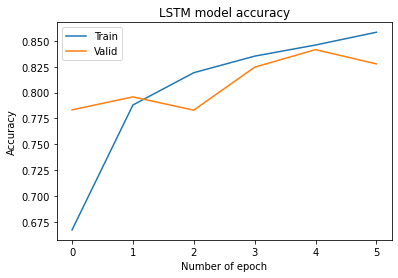

In [36]:
# Plotting graph for model built
# Accuracy graph
plt.title('LSTM model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epoch')
plt.plot(rnn_history.history['acc'], label = 'Train')
plt.plot(rnn_history.history['val_acc'], label = 'Valid')
plt.legend(loc='best')
plt.show()


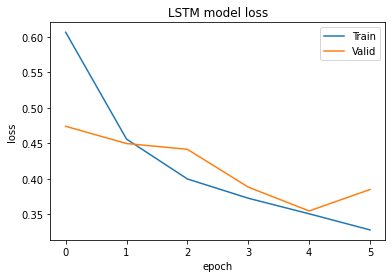

In [37]:
# Loss graph
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(rnn_history.history['loss'], label = 'Train')
plt.plot(rnn_history.history['val_loss'], label = 'Valid')
plt.legend(loc='best')
plt.show()

In [38]:
# Final Results
print("\nDeep Neural Network")
print("Traning Accuracy : {}" .format(dnn_history.history['acc']))
print("Validation Accuracy : {}" .format(dnn_history.history['val_acc']))
print("\nTraning Loss : {}" .format(dnn_history.history['loss']))
print("Validation Loss : {}" .format(dnn_history.history['val_loss']))


Deep Neural Network
Traning Accuracy : [0.6448666453361511, 0.739633321762085, 0.7660333514213562, 0.7856333255767822, 0.79830002784729, 0.8032666444778442]
Validation Accuracy : [0.7239999771118164, 0.7422666549682617, 0.6462666392326355, 0.7229333519935608, 0.7365333437919617, 0.7053333520889282]

Traning Loss : [0.6334037184715271, 0.5241066813468933, 0.484424889087677, 0.45599445700645447, 0.43490418791770935, 0.4258086383342743]
Validation Loss : [0.5470054745674133, 0.5245143175125122, 0.7397938370704651, 0.5596622228622437, 0.5380825400352478, 0.6132792830467224]


In [39]:
print("\n\n\nLSTM")
print("Traning Accuracy : {}" .format(rnn_history.history['acc']))
print("Validation Accuracy : {}" .format(rnn_history.history['val_acc']))
print("\nTraning Loss : {}" .format(rnn_history.history['loss']))
print("Validation Loss : {}" .format(rnn_history.history['val_loss']))




LSTM
Traning Accuracy : [0.6674333214759827, 0.7880333065986633, 0.8191999793052673, 0.8352000117301941, 0.8459333181381226, 0.8582666516304016]
Validation Accuracy : [0.7833333611488342, 0.7958666682243347, 0.7830666899681091, 0.8245333433151245, 0.8414666652679443, 0.8277333378791809]

Traning Loss : [0.6065195798873901, 0.4559779763221741, 0.3997955620288849, 0.3726635277271271, 0.35072797536849976, 0.3280276358127594]
Validation Loss : [0.4740440547466278, 0.4497263431549072, 0.441570907831192, 0.38831886649131775, 0.3547537326812744, 0.3849625289440155]
